In [4]:
from sklearn import datasets 
import numpy as np
import seaborn as sns
import pandas as pd

# Regresión Lineal

Un modelo de regresión lineal resuelve el problema de predecir una variable continua dado un dataset de variables independientes. O bien estamos tratando de estimar la distribución:

$$P(y|w, D)$$

donde $y$ es la variable a predecir y $D$ son los datos y $w$ son los parametros de nuestro modelo.

Tipicamente los datos podemos modelarlos como puntos en plano (o en el espacio si son más de dos variables independientes). Vamos a ilustrar la teoría de regresiones lineales usando el dataset irirs:

In [5]:
iris = datasets.load_iris()

In [6]:
names=[name[0:-5] for name in iris['feature_names']]

iris_df = pd.DataFrame(iris['data'], columns=names)
#iris_df = iris_df.join(pd.DataFrame(iris['target'], columns=['target']))

iris_df.head()


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Vamos a predecir la variable 'sepal length' usando las otras tres variables como nuestras variables independientes.

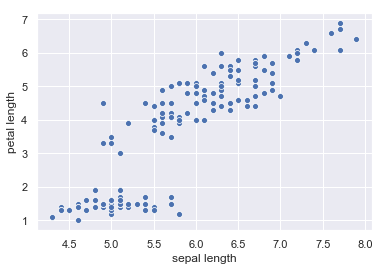

In [8]:
sns.set()
sns.scatterplot(iris_df['sepal length'], iris_df['petal length'] )

En este caso lo que nos interesaría descrubir es una relación lineal entre sepal length y petal length. Vemos que es posible que esta exista.

Y quisieramos escribirla de la siguiente manera. Si llamamos $y$ a la variable petal length y $x$ a la variable sepal length, lo que buscamos es una dos números $m$ y $c$ tales que para cada observación $x_i$ en el dataset el valor: 

$$\hat{y}_i=mx_i+c$$

sea lo más cercano posible a $y_i$. En este caso $\hat{y}$ es nuestra predicción basada en los datos ($x_i$) y en los parametros $m, c$, mientras que $y_i$ es el valor real estimado.

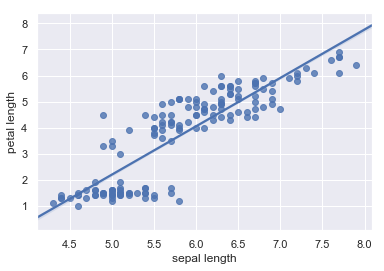

In [9]:
sns.set()
sns.regplot(x=iris_df['sepal length'], y=iris_df['petal length'] , 
            data=iris_df,ci=50, fit_reg=True)

#sns.regplot?

## ¿Cómo sabemos que tan bien funciona el modelo?

El objetivo último de machine learning es minimizar el error de predicción. Para eso primero tenemos que poder calcular una métrica de error para todo el modelo.

Podemos calcular un error para cada punto y cada predicción de tres maneras: 

1. Dieferencia: $$(\hat{y_i}-y_i)$$

2. Diferencia cuadrada: $$(\hat{y_i}-y_i)^2$$

3. Diferencia Absoluta: $$abs(\hat{y_i}-y_i)$$
    

Las tres diferencias tienen sus ventajas y desventajas. Por ejemplo: la diferencia simple nos puede decir si el sesgo de nuestra predicción está por encima o por debajo del valor real, sin embargo los errores pueden cancelarse y al entrenar el modelo podemos toparnos con que el error total para todos los puntos es cero pero que las distancias absolutas a los puntos son grandes, tanto positivas como negativas.

La diferencia cuadrada y absoluta son las más usadas por los modelos como funciones perdida o loss functions.

### Suma de errores (Loss Functions)

Luego de calcular el error por cada uno de los puntos, podemos tener una medida del error de todo el modelo, ya sea sumando los errores o tomando los promedios (de las $n$ oservaciones en el dataset):

1. Suma de errores cuadrados o residuales: $$RSS = \sum_i (\hat{y_i}-y_i)^2$$
2. Promedio de errores cuadrados : $$MSE = 1/n \sum_i (\hat{y_i}-y_i)^2$$


3. Suma de errores absolutos: $$SAE = \sum_i abs(\hat{y_i}-y_i)$$
4. Promedio de errores cuadrados : $$MAE = 1/n \sum_i abs(\hat{y_i}-y_i)$$

In [10]:
def rss(y, y_i):
    return ((y-y_i)**2).sum()

#Escribamos el código para las otras métricas.
Z = np.array([1, 2])
Z_1 =np.array([-1, 1])

rss(Z, Z_1)

def rss_int(y, y_i):
    return (y-y_i)**2

rss_int(2, 1)

def mse(y, y_i):
    return ((y-y_i)**2).sum()/len(y)

mse(Z, Z_1)

2.5

## ¿Como programar el algorítmo de regresión?

Para entrenar el modelo vamos a usar el algorítmo ya programado por los creadores de Scikit-learn. 

In [11]:
from sklearn.linear_model import LinearRegression

El modelo en scikit-learn requiere que le pasemos la variable objetivo ($y$) como un array de 1 dimensión; y también espera que los ejemplos ($\mathbf{X}$) vengan en forma de un array de dos dimensiones (aunque solo haya una columna o característica).

In [83]:
# Creamos el dataset para entrenar el modelo
X=np.array(iris_df['sepal length']).reshape(-1, 1)
y=np.array(iris_df['petal length']).reshape(-1, 1)

X.shape, y.shape



((150, 1), (150, 1))

In [13]:
#Creamos una instancia del modelo: 
lr = LinearRegression()

#Este paso entrema el modelo
model = lr.fit(X, y)

#Podemos accesar a los coeficientes y al intercepto del modelo
m, c = model.coef_ , model.intercept_

m, c

(array([[1.85750967]]), array([-7.09538148]))

In [14]:
m_array = np.linspace(1.56, 2.15, num=20)
c_array = np.linspace(-6.5, -7.5, num=20)


errors = []
for i in m_array:
    y_i = X*i+c
    errors.append(rss(y, y_i))
        
error = np.array(errors)

In [15]:
errors_df = pd.DataFrame({"Pendiente (m)":m_array, "Error":error})
sns.lineplot(x="Pendiente (m)", y="Error", 
             data = errors_df).set_title('Error cambiando a medida 
                                         cambia la pendiente del modelo')


SyntaxError: EOL while scanning string literal (<ipython-input-15-4df1a8a69899>, line 3)

Text(0.5,1,'Error cambiando a medida cambia')


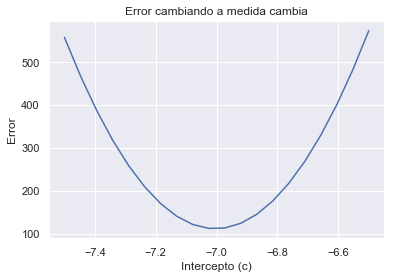

In [16]:
errors_df = pd.DataFrame({"Intercepto (c)":c_array, "Error":error})
print(sns.lineplot(x="Intercepto (c)", y="Error"
                   , data = errors_df).set_title('Error cambiando a medida cambia'))


# Generalización a mayores dimensiones.

Podemos generalizar la ecuación de regresión a mayores dimensiones. Si $\mathbf{X}$ es el vector de características y $\mathbf{\theta}$ es el vector de parametros. Entonces nuestra ecuación de regresión se convierte en 

$$y = \mathbf{\theta}\mathbf{X}$$

# ¿Por que nos interesaría usar más variables?

In [55]:
X_mat = pd.DataFrame(iris['data'], columns=names).drop('petal length', axis=1)


In [79]:
X_mat.shape


(150, 3)

In [81]:
lr = LinearRegression()

#Este paso entrema el modelo
model_multi = lr.fit(X_mat, y)

#Podemos accesar a los coeficientes y al intercepto del modelo
m, c = model_multi.coef_ , model_multi.intercept_
B = model_multi.coef_ 
w_0= model_multi.intercept_
B, w_0


(array([[ 0.7303629 , -0.65139445,  1.44571962]]), array([-0.25266445]))

In [84]:
model.score(X,y)


0.7599553107783261

In [62]:
model_multi.score(X_mat, y)


0.968150119089107

Arriba estamos usando el Coeficiente de Determinacion para estimar que tan bien funciona el modelo. Lo que nos dice el Coeficiente, $R^2$, es cuanta variabilidad de la variable independiente es debido a la variabilidad de las variables independientes.

$$R^2 = (1 - u/v)$$

, donde u es la suma cuadrada de residuos 

$$u = \sum (\hat{y}-y)^2$$

y v es la suma total de desviaciones cuadradas: 
  
$$v = \sum (\hat{y}-\bar{y})^2 $$

Un valor de 1 es muy bueno mientras que valores cercanos a 0 dice que no el modelo no captura la relación entre $x$ y $y$.

# Error de generalización

Ahora que sabemos modelar una relación lineal entre las variables dependientes e independiente podemos calcular una predicción sobre datos que no hayamos visto. 

Y podemos calcular el error en la predicción con valores no vistos. Para ello podemos partir el dataset en dos: una parte para entrenar el modelo o training set y otra parte para validar que el modelo entrenado puede hacer predicciones sobre datos nunca vistos.

$$MSE = 1/n\sum (y_{test} - y_{prediccion})^2$$

In [86]:
X=np.array(pd.DataFrame(iris['data'], columns=names).drop('petal length', axis=1))
y=np.array(iris_df['petal length']).reshape(-1, 1)




In [63]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [90]:
X_train.shape, X_test.shape


((120, 3), (30, 3))

In [100]:
lr = LinearRegression()

#Este paso entrema el modelo
model_tr = lr.fit(X_train, y_train)

#Podemos accesar a los coeficientes y al intercepto del modelo
m, c = model_tr.coef_ , model_tr.intercept_

m, c

#X_train.shape[0]/X.shape[0]


(array([[ 0.74367265, -0.55340039,  1.47199359]]), array([-0.67449867]))

In [101]:
model_tr.score(X_test, y_test)


0.9475542374063679

In [102]:
from sklearn.metrics import mean_squared_error, r2_score


In [104]:
y_pred = model_tr.predict(X_test)

print('El error promedio cuadrado es: {:0.2f}'.format( mean_squared_error(y_test, y_pred)))

print('De nuevo el score del modelo en el test set es: {:0.2f} (1 es una predicción perfecta)'.format(r2_score(y_test, y_pred)))


El error promedio cuadrado es: 0.13
De nuevo el score del modelo en el test set es: 0.95 (1 es una predicción perfecta)


# Solución Teórica

Ahora que sabemos que añadir más variables nos puede servir por lo menos a explicar mejor cambios en la variable a predecir, veamos cuales son las soluciones del problema de regresión.

La solución para $\mathbf{\theta}$ está dada por $$\theta^* = (X^T X)^{-1} X^T y$$

Si ahora el modelo es 

$$y = \mathbf{\theta}\mathbf{X} + \mathbf{\varepsilon}$$

donde  $\mathbf{\varepsilon}$ es un vector de errores normalmente distribuido.

$$\hat{\theta} = (X^T X)^{-1} X^T y + (X^T X)^{-1} X^T \varepsilon$$

$$\hat{\theta} = \theta^* + (X^T X)^{-1} X^T \varepsilon$$

Y entonces el parámetro estimado es también normalmente distribuido.

# Bonus: Solución estilo Inferencia Estadística de la Regresión

Si son amantes de la inferencia estadística y de estudiar como se comportan los parametros del modelo una vez entrenado, pueden usar la librería statsmodels que da resultados más tradicionales sobre el modelo de regresión.

In [41]:
import statsmodels.api as sm

mod = sm.OLS(y, X_mat)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              8426.
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                   3.14e-164
Time:                        15:32:08   Log-Likelihood:                         -39.808
No. Observations:                 150   AIC:                                      85.62
Df Residuals:                     147   BIC:                                      94.65
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------